# Integrentes:

* `Andresa Bicudo`
* `Gabriel Yamashita`
* `Leonardo Malta`

# Introdução 
A pandemia do corona vírus fez com que o futebol parasse, inclusive o campeonato inglês (Premiere League). Existem campeonatos que foram interrompidos, como o campeonato francês, mesmo sem ter finalizado todos os jogos e também há campeonatos que retonaram porém com desempenhos diferentes de cada equipe. Isso fez com que surgisse o seguinte questionamento: o que provavelmente ocorreria com o campeonato inglês se a pandemia não tivesse interrompido o campeonato?

# Objetivo:
Prever o restante do campeonato inglês com base no desempenho e estatísitcas das equipes até a 30ª rodada. 

# Separação dos Dados:

In [176]:
# Importanto Bibliotecas para o Trabalho:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import scipy as scp
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [177]:
dados = pd.read_excel('masterdata.xlsx')
dados.head(5)

,MatchID,Home_team,Away_team,Score_home,Score_away,Possession_home,Possession_away,Shots_on_target_home,Shots_on_target_away,Shots_home,Shots_away,Touches_home,Touches_away,Passes_home,Passes_away,Tackles_home,Tackles_away,Clearances_home,Clearances_away,Corners_home,Corners_away,Offsides_home,Offsides_away,Yellow_cards_home,Yellow_cards_away,Fouls_conceded_home,Fouls_conceded_away,Red_cards_home,Red_cards_away,year,Expenditures_home,Arrivals_home,Income_home,Departures_home,Expenditures_away,Arrivals_away,Income_away,Departures_away
0,5937,Blackburn,Reading,3,3,54.0,46.0,6,4,15,11,553,464,356,287,22,13,33,19,5,10,5,3,2,0,18,7,0,0,2007,18.84,21,19.28,25,10.52,25,0.00,19
1,5938,Bolton,Aston Villa,2,2,47.1,52.9,2,2,11,7,457,493,318,343,24,15,23,20,7,6,0,2,2,1,10,11,0,0,2007,19.38,16,4.39,16,28.16,17,2.08,18
2,5939,Chelsea,Everton,1,1,59.3,40.7,7,6,20,11,615,471,425,305,23,22,10,28,10,2,6,2,2,1,13,7,0,0,2007,101.43,23,59.96,22,20.41,11,2.85,16
3,5940,Liverpool,Charlton,2,2,61.6,38.4,5,4,23,9,632,420,453,271,20,14,22,29,9,2,6,4,0,0,5,13,0,0,2007,52.44,27,23.94,28,24.68,31,2.59,36
4,5941,Man Utd,West Ham,0,1,65.3,34.7,7,2,30,8,825,506,619,333,28,26,18,47,14,3,0,1,0,2,13,12,0,0,2007,31.01,25,20.52,29,79.63,22,7.70,23


In [178]:
def Determina_Resultado(df, home, away):
    if df[home] > df[away]:
        return 0
    elif df[home] < df[away]:
        return 1
    elif df[home] == df[away]:
        return 2


dados['Result'] = dados.apply(
    lambda dados: Determina_Resultado(dados, 'Score_home', 'Score_away'), axis=1)
dados.head(5)

,MatchID,Home_team,Away_team,Score_home,Score_away,Possession_home,Possession_away,Shots_on_target_home,Shots_on_target_away,Shots_home,Shots_away,Touches_home,Touches_away,Passes_home,Passes_away,Tackles_home,Tackles_away,Clearances_home,Clearances_away,Corners_home,Corners_away,Offsides_home,Offsides_away,Yellow_cards_home,Yellow_cards_away,Fouls_conceded_home,Fouls_conceded_away,Red_cards_home,Red_cards_away,year,Expenditures_home,Arrivals_home,Income_home,Departures_home,Expenditures_away,Arrivals_away,Income_away,Departures_away,Result
0,5937,Blackburn,Reading,3,3,54.0,46.0,6,4,15,11,553,464,356,287,22,13,33,19,5,10,5,3,2,0,18,7,0,0,2007,18.84,21,19.28,25,10.52,25,0.00,19,2
1,5938,Bolton,Aston Villa,2,2,47.1,52.9,2,2,11,7,457,493,318,343,24,15,23,20,7,6,0,2,2,1,10,11,0,0,2007,19.38,16,4.39,16,28.16,17,2.08,18,2
2,5939,Chelsea,Everton,1,1,59.3,40.7,7,6,20,11,615,471,425,305,23,22,10,28,10,2,6,2,2,1,13,7,0,0,2007,101.43,23,59.96,22,20.41,11,2.85,16,2
3,5940,Liverpool,Charlton,2,2,61.6,38.4,5,4,23,9,632,420,453,271,20,14,22,29,9,2,6,4,0,0,5,13,0,0,2007,52.44,27,23.94,28,24.68,31,2.59,36,2
4,5941,Man Utd,West Ham,0,1,65.3,34.7,7,2,30,8,825,506,619,333,28,26,18,47,14,3,0,1,0,2,13,12,0,0,2007,31.01,25,20.52,29,79.63,22,7.70,23,1


# Obtendo Variáveis de Interesse  

In [179]:
# Definindo variáveis imortantes: 
stats = dados.drop(columns=[
    'MatchID', 'Home_team', 'Away_team', 'Score_home', 'Score_away',
    'year', 'Result'
])

games = dados.loc[: , ['Home_team', 'Away_team']]
results = dados.loc[: , ['Result']]

stats.head(5)

,Possession_home,Possession_away,Shots_on_target_home,Shots_on_target_away,Shots_home,Shots_away,Touches_home,Touches_away,Passes_home,Passes_away,Tackles_home,Tackles_away,Clearances_home,Clearances_away,Corners_home,Corners_away,Offsides_home,Offsides_away,Yellow_cards_home,Yellow_cards_away,Fouls_conceded_home,Fouls_conceded_away,Red_cards_home,Red_cards_away,Expenditures_home,Arrivals_home,Income_home,Departures_home,Expenditures_away,Arrivals_away,Income_away,Departures_away
0,54.0,46.0,6,4,15,11,553,464,356,287,22,13,33,19,5,10,5,3,2,0,18,7,0,0,18.84,21,19.28,25,10.52,25,0.00,19
1,47.1,52.9,2,2,11,7,457,493,318,343,24,15,23,20,7,6,0,2,2,1,10,11,0,0,19.38,16,4.39,16,28.16,17,2.08,18
2,59.3,40.7,7,6,20,11,615,471,425,305,23,22,10,28,10,2,6,2,2,1,13,7,0,0,101.43,23,59.96,22,20.41,11,2.85,16
3,61.6,38.4,5,4,23,9,632,420,453,271,20,14,22,29,9,2,6,4,0,0,5,13,0,0,52.44,27,23.94,28,24.68,31,2.59,36
4,65.3,34.7,7,2,30,8,825,506,619,333,28,26,18,47,14,3,0,1,0,2,13,12,0,0,31.01,25,20.52,29,79.63,22,7.70,23


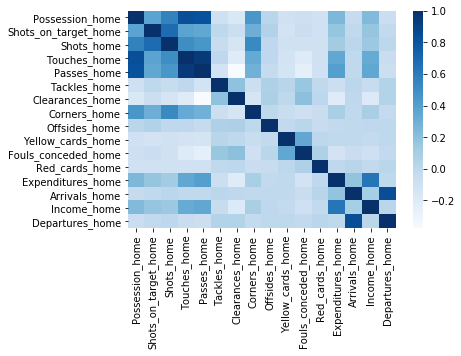

In [180]:
# Obtendo a correlação dos dados para times que jogam em seu estádio:
home_features = [i for i in list(stats) if '_home' in i]
corr = stats[home_features].corr()
sns.heatmap(corr, cmap="Blues")

A partir da análise do heatmap, é possível saber se duas variáveis estão medindo características similares. Por exemplo, a quantidade de passes ("touches_home") está muito interligada com a posse de bola. Para eliminar as variáveis que se relacionam entre sí, usa-se o "Variance Inflation Factor", que é um fator que indentifica multicolinearidade de duas variáveis. Valores maiores que 5 significa que há muita correlação. Mais informações em: https://www.statisticshowto.com/variance-inflation-factor/.

In [181]:
# Enumera elementos de uma lista para percorrer com o for
enumerate(list(stats))

In [182]:
variance_inflation = []
for i, feature in enumerate(list(stats)):
    vif_tup = (feature, variance_inflation_factor(stats.values, i))
    variance_inflation.append(vif_tup)

relevant_features = []

for i in range(len(variance_inflation)):
    if variance_inflation[i][1] < 5:
        relevant_features.append(variance_inflation[i][0])

relevant_features

['Offsides_home',
 'Offsides_away',
 'Yellow_cards_home',
 'Yellow_cards_away',
 'Red_cards_home',
 'Red_cards_away',
 'Expenditures_home',
 'Income_home',
 'Expenditures_away',
 'Income_away']

# Modelo 1 - Regressão Logística Multinomial 

In [193]:
X = (stats.loc[: , relevant_features]).values
y = results.values

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
LogisticRegression().fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [208]:
logit_model = sm.MNLogit(sm.add_constant(X_train), sm.add_constant(X_train))
result = logit_model.fit()
stats1 = result.summary()
stats2 = result.summary2()
print(stats1)
print(stats2)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2219: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\user\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2220: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x 

Optimization terminated successfully.
         Current function value: nan
         Iterations 2
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 3644
Model:                        MNLogit   Df Residuals:                     3534
Method:                           MLE   Df Model:                          100
Date:                Thu, 04 Jun 2020   Pseudo R-squ.:                     nan
Time:                        17:05:48   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -4505.1
Covariance Type:            nonrobust   LLR p-value:                       nan
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
x1                nan        nan  

# Coisas que deram ERRADO :(

In [ ]:
# Removendo dados por meio do valor p:
logit_model = sm.MNLogit(
    Modelo('Liverpool', 'Man City', stats)[1],
    sm.add_constant(Modelo('Liverpool', 'Man City', stats)[0]))

result = logit_model.fit()
stats1 = result.summary()
stats2 = result.summary2()
print(stats1)

In [ ]:
print(stats2)

In [ ]:
# Resultados
result.predict(sm.add_constant(x_treinamento))